# Venus Cloud-Top Wind Tracking
Using Akatsuki IR2 and UVI images to measure and compare zonal wind speeds in Venus’s upper atmosphere.

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ir2_file = 'data/ir2_20160517_120822_202_l2b_v10.fit'
uvi_file = 'data/uvi_20160517_121341_283_l2b_v10.fit'

In [18]:
with fits.open(ir2_file) as ir2_hdul:
    ir2_data = ir2_hdul[1].data
    ir2_header = ir2_hdul[1].header

with fits.open(uvi_file) as uvi_hdul:
    uvi_data = uvi_hdul[1].data
    uvi_header = uvi_hdul[1].header

In [20]:
print(ir2_header)
print(uvi_header)

XTENSION= 'IMAGE   '           / type of extension                              BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 1024 / length of data axis 1                          NAXIS2  =                 1024 / length of data axis 2                          PCOUNT  =                    0 / number of parameters per group                 GCOUNT  =                    1 / number of groups                               EXTNAME = 'IR2-LEVEL2b'        / name of this HDU                               EXTVER  =                    0 / version of the extension                       ORIGIN  = 'VCO/LEON team'      / organization responsible for the data          DATE    = '2019-04-10T22:33:22' / date of generation of this HDU in UTC         DATE-BEG= '2016-05-17T12:07:53.849' / date of the start of observation in UTC   DATE-OBS= '2016-05-17T12:08:22.318' / da

In [22]:
def normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

ir2_norm = normalize(ir2_data)
uvi_norm = normalize(uvi_data)

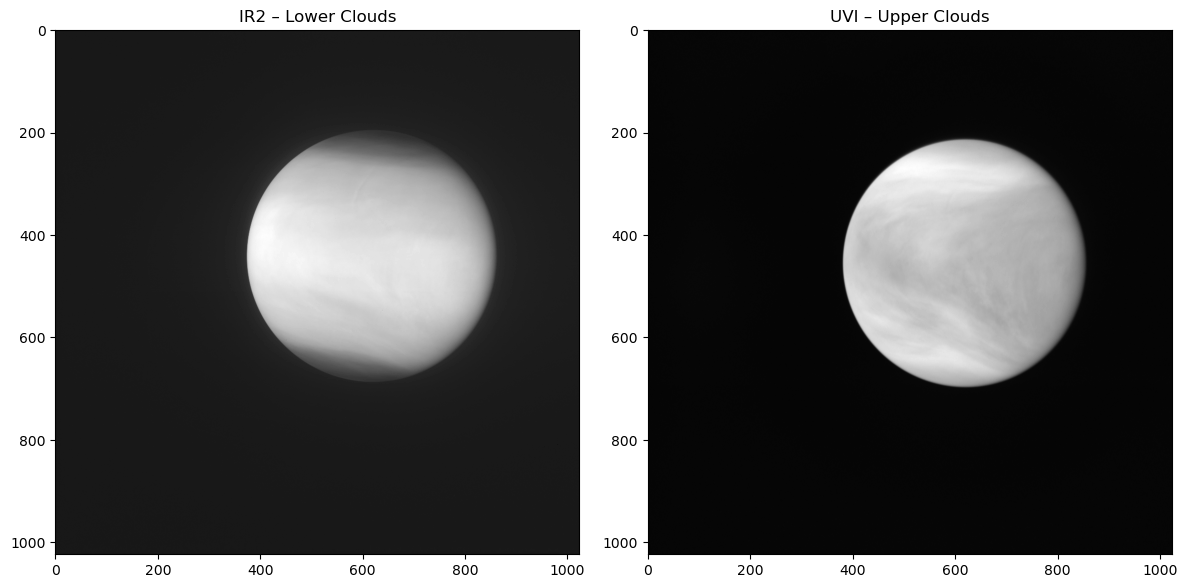

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(ir2_norm, cmap='gray')
axs[0].set_title('IR2 – Lower Clouds')

axs[1].imshow(uvi_norm, cmap='gray')
axs[1].set_title('UVI – Upper Clouds')

plt.tight_layout()
plt.show()